In [2]:
donor_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/ipsc_samples_cuomo.txt"
df = read.csv(donor_filename, sep = "\t")
head(df)
donors = rownames(df)
length(unique(donors))

,Donor...Observations
HPSI0813i-guss_1,5
HPSI0214i-datg_2,4
HPSI0413i-nudd_1,4
HPSI0114i-zapk_3,3
HPSI0214i-pelm_3,3
HPSI0114i-vass_1,3


[1] 87

In [3]:
# load sceset
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [13]:
# sce_0 = sce[,sce$day == 'day0']
sce_0

class: SingleCellExperiment 
dim: 11231 9661 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(9661): 21672_1#101 21672_1#102 ... 24475_8#96 24475_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [5]:
table(sce_0$donor_short_id)[table(sce_0$donor_short_id)<10]
length(unlist(table(sce_0$donor_short_id)[table(sce_0$donor_short_id)>=10]))

tavh_2 
     2

[1] 111

[1] 383

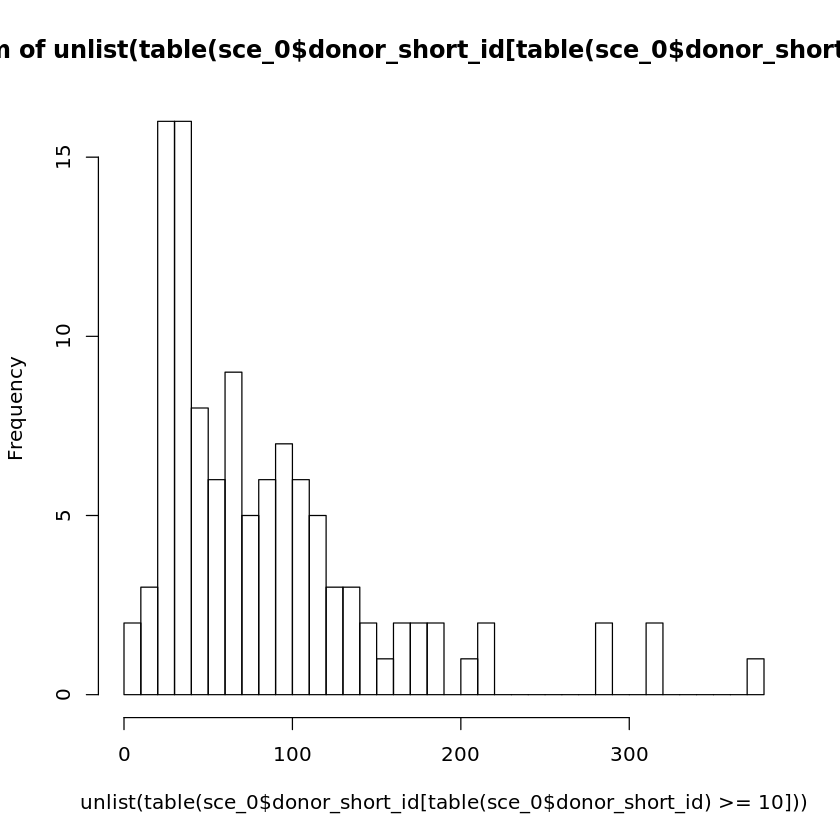

In [6]:
max(unlist(table(sce_0$donor_short_id)))
hist(unlist(table(sce_0$donor_short_id[table(sce_0$donor_short_id)>=10])), breaks = 30)
# hist(sce_0$donor_short_id)

In [7]:
length(unique(sce_0$experiment))

[1] 24

In [8]:
length(unique(sce_0$donor_short_id))

[1] 112

In [9]:
length(rowSums(table(sce_0$donor_short_id, sce_0$experiment)>0)[rowSums(table(sce_0$donor_short_id, sce_0$experiment)>0)>1])

[1] 23

In [10]:
get_sums <- function(sce, assay, ngenes, ndonors){
    sums <- matrix(0,nrow = ngenes, ncol = ndonors)
    for (i in 1:ndonors){
        d = assay[,sce$donor_long_id==unique(sce$donor_long_id)[i]]
        sums[,i] = rowSums(d)
        }
    rownames(sums) = rownames(sce)
    colnames(sums) = unique(sce$donor_long_id)
    sums
}

In [11]:
# sce_0 = sce_0[,sce_0$donor !="tavh"]

In [14]:
sce_0 = sce_0[,sce_0$donor_long_id %in% donors]

In [31]:
pseudobulk <- get_sums(sce_0, counts(sce_0), nrow(sce_0), length(unique(sce_0$donor_long_id)))

In [32]:
pseudobulk[1:5,1:5]

,HPSI0114i-zapk_3,HPSI0214i-wibj_2,HPSI1013i-jogf_2,HPSI0214i-pelm_3,HPSI0114i-vass_1
ENSG00000000003_TSPAN6,11840.9408,4926.21203,8068.0271,11889.6832,6151.1446
ENSG00000000419_DPM1,14535.6590,4068.41796,9189.2035,15187.9292,8442.1485
ENSG00000000457_SCYL3,210.1264,44.42329,123.2103,299.5744,88.3996
ENSG00000000460_C1orf112,2604.2899,652.94975,1430.3434,2549.4794,1106.6394
ENSG00000001036_FUCA2,4395.8593,1527.71712,3395.5545,5212.3862,2843.6126


In [4]:
library(ggplot2)

In [34]:
df = data.frame(donor = colnames(pseudobulk), total_reads = colSums(pseudobulk))
head(df,2)

,donor,total_reads
HPSI0114i-zapk_3,HPSI0114i-zapk_3,120607330
HPSI0214i-wibj_2,HPSI0214i-wibj_2,24143006


In [35]:
mean(df$total_reads)/1000000
median(df$total_reads)/1000000

[1] 48.61879

[1] 39.39854

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


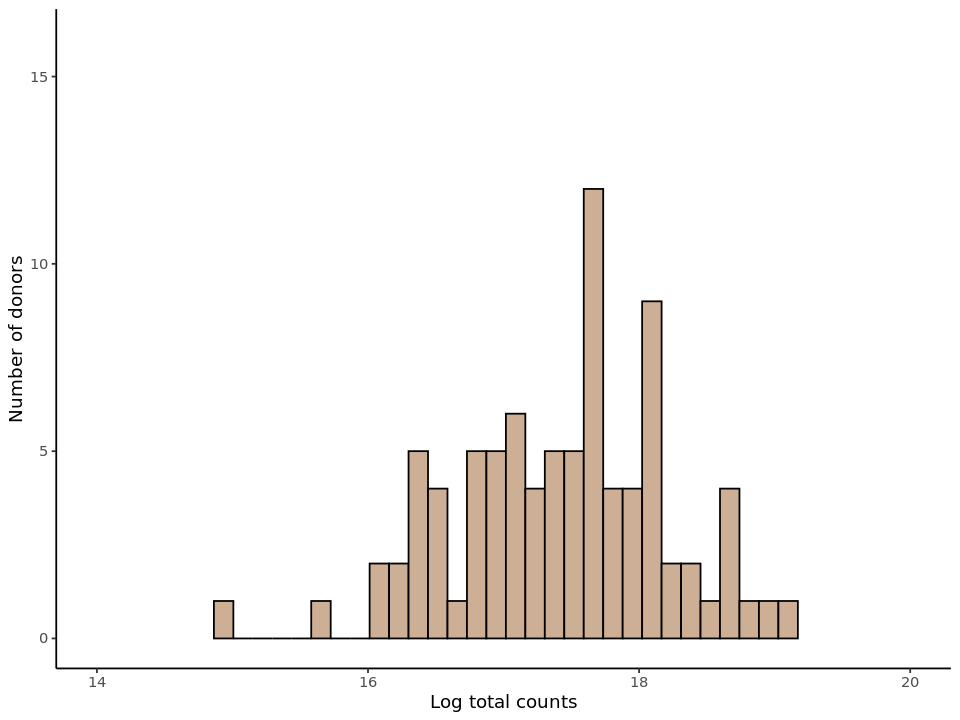

In [36]:
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df, aes(x=log(total_reads))) + geom_histogram(alpha = 1, col = "black", fill = "peachpuff3") + 
    xlab("Log total counts") + ylab("Number of donors") +
    coord_cartesian(xlim = c(14, 20), ylim = c(0,16)) + theme_classic()
p

In [5]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/figures/"

In [38]:
pdf(paste0(fig_dir,"Fig_S1a.pdf"), width=8, height=6)
p
dev.off()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


png 
  2

In [39]:
###### bulk
bulk <- readRDS("/hps/nobackup/stegle/users/acuomo/singlecell_endodiff/miscellaneous/merged_bulk_salmon_quant.rds")

In [40]:
logcpm_bulk <- edgeR::cpm(counts(bulk), prior.count = 2, log = TRUE)
newcols <- gsub(".*/quant_salmon/*","",colnames(logcpm_bulk))
cols <- gsub("*.hs.*","",newcols)
colnames(logcpm_bulk) <- cols
head(logcpm_bulk)

,HPSI0114i-bezi_1,HPSI0114i-bezi_3,HPSI0114i-eipl_1,HPSI0114i-eipl_3,HPSI0114i-fikt_3,HPSI0114i-iisa_1,HPSI0114i-iisa_3,HPSI0114i-joxm_1,HPSI0114i-kolf_2,HPSI0114i-kolf_3,...,HPSI0516i-eitu_4,HPSI0516i-goek_4,HPSI0516i-hapz_2,HPSI0516i-hapz_3,HPSI0516i-iool_4,HPSI0516i-iool_6,HPSI0516i-oazw_3,HPSI0516i-oazw_4,HPSI0516i-pews_2,HPSI0516i-pews_3
ENSG00000000003_TSPAN6,6.7478423,7.3723219,6.6027879,6.670467,6.5325557,6.2607908,6.2049043,6.4136346,6.3794240,6.0982380,...,4.7023961,6.1149095,6.57452770,6.1132145,6.2374677,6.4816297,6.3242236,6.7140318,6.765941,6.5507389
ENSG00000000005_TNMD,1.2396445,2.6075143,2.7457270,1.796040,1.8062487,1.4958215,1.4846523,1.2493527,1.4316536,1.4975600,...,-0.6699662,1.6624273,0.05885042,1.5629860,1.9526607,0.4264122,2.0207997,0.9451023,3.115977,0.7879407
ENSG00000000419_DPM1,6.4351540,6.5435280,6.4535352,6.488400,6.7655019,6.4641320,6.4412406,6.4584660,6.5721151,6.4799760,...,4.8197038,6.3267307,6.40022473,6.5999318,6.5161226,6.4691210,6.5576157,6.5994284,6.660242,6.5900378
ENSG00000000457_SCYL3,2.3010799,2.9414570,2.6672173,2.182401,2.3778015,2.4083688,2.4962583,2.2587505,1.8163995,2.2621010,...,1.9565996,1.9252852,2.30901525,2.0644377,2.1351029,2.2461685,2.0773365,2.5382794,2.181280,2.0659557
ENSG00000000460_C1orf112,4.1690783,4.4894089,4.1502208,4.383631,4.8552867,4.6337829,4.6588062,4.2474378,4.6036446,4.0224097,...,2.7470801,4.6034535,4.91861630,4.9475882,4.7577833,4.9104630,5.0092311,5.1485615,4.999442,4.7960390
ENSG00000000938_FGR,-0.5687158,-0.4913128,-0.5636239,-1.567461,-0.1777691,-0.6055767,-0.6931276,-0.2360887,-0.6081928,-0.6951849,...,-1.2646136,-0.9360776,-0.50224959,-0.9039374,-0.8155414,-1.1706325,-0.8873781,-0.8635696,-1.576341,-1.4254717


In [41]:
cpm_bulk = counts(bulk)
newcols <- gsub(".*/quant_salmon/*","",colnames(cpm_bulk))
cols <- gsub("*.hs.*","",newcols)
colnames(cpm_bulk) <- cols

In [42]:
cpm_bulk_sc = cpm_bulk[,colnames(cpm_bulk) %in% donors]
ncol(cpm_bulk_sc)

[1] 87

In [43]:
df = data.frame(donor = colnames(cpm_bulk_sc), total_reads = colSums(cpm_bulk_sc))

In [49]:
max(df$total_reads)

[1] 98133552

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


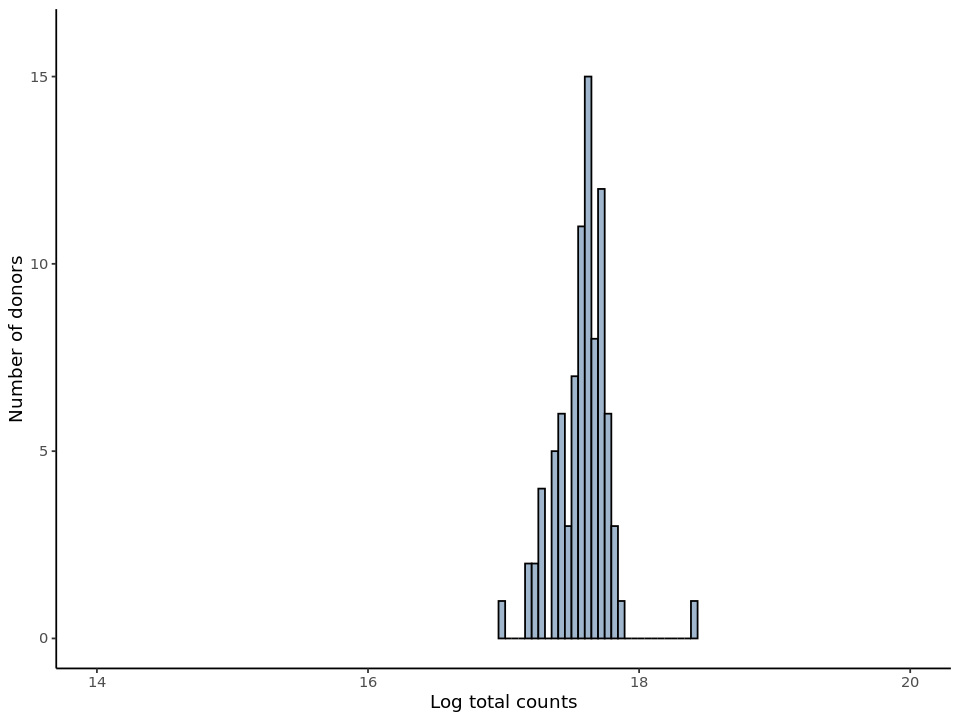

In [44]:
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df, aes(x=log(total_reads))) + geom_histogram(alpha = 1, col = "black", fill = "slategray3") + 
    xlab("Log total counts") + ylab("Number of donors") +
    coord_cartesian(xlim = c(14, 20), ylim = c(0,16)) + theme_classic()
p

In [45]:
pdf(paste0(fig_dir,"Fig_S1b.pdf"), width=8, height=6)
p
dev.off()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


png 
  2

In [ ]:
# SmartSeq2 (iPSC)

In [1]:
# load sceset
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [4]:
# df1 = data.frame(cell = colnames(sce), day = sce$day, donor_long_id = sce$donor_long_id)
head(df1)

cell,day,donor_long_id
21843_1#10,day1,HPSI0114i-joxm_1
21843_1#100,day1,HPSI0314i-fafq_1
21843_1#101,day1,HPSI0314i-fafq_1
21843_1#102,day1,HPSI1013i-wuye_2
21843_1#103,day1,HPSI0114i-joxm_1
21843_1#105,day1,HPSI0114i-iisa_3


In [6]:
write.csv(df1, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/coldata.csv")

In [7]:
nrow(df1)

[1] 36044

In [11]:
df = read.csv("/hps/nobackup/hipsci/scratch/ComparingQtlMapping/GTE/GTE_HipSciSingleCellDay0Healthy.txt", sep = "\t")
head(df)

Genotype,cell
HPSI1014i-eesb_1,25476_7#100
HPSI1014i-eesb_1,25476_7#105
HPSI1014i-eesb_1,25476_7#141
HPSI1014i-eesb_1,25476_7#171
HPSI1014i-eesb_1,25476_7#190
HPSI1014i-eesb_1,25476_7#202


In [15]:
geno_df = read.csv("/hps/nobackup/hipsci/scratch/ComparingQtlMapping/GTE/GTE_HipSciBulkDay0HealthyExp_89.txt", sep = "\t")
head(geno_df)
df = df[df$Genotype %in% geno_df$Genotype,]

Genotype,RNA
HPSI0114i-joxm_1,joxm_1_expt_09
HPSI1013i-wuye_2,wuye_2_expt_09
HPSI0114i-joxm_1,joxm_1_expt_09
HPSI0114i-iisa_3,iisa_3_expt_09
HPSI1013i-wuye_2,wuye_2_expt_09
HPSI0114i-iisa_3,iisa_3_expt_09


In [16]:
library(dplyr)

In [17]:
df4 = df %>% group_by(Genotype) %>% summarise(ncells=n())
head(df4)

Genotype,ncells
HPSI0114i-bezi_1,13
HPSI0114i-eipl_1,99
HPSI0114i-iisa_3,38
HPSI0114i-joxm_1,383
HPSI0114i-kolf_2,73
HPSI0114i-vass_1,106


In [18]:
nrow(df4)
nrow(df4[df4$ncells>5,])

[1] 89

[1] 89

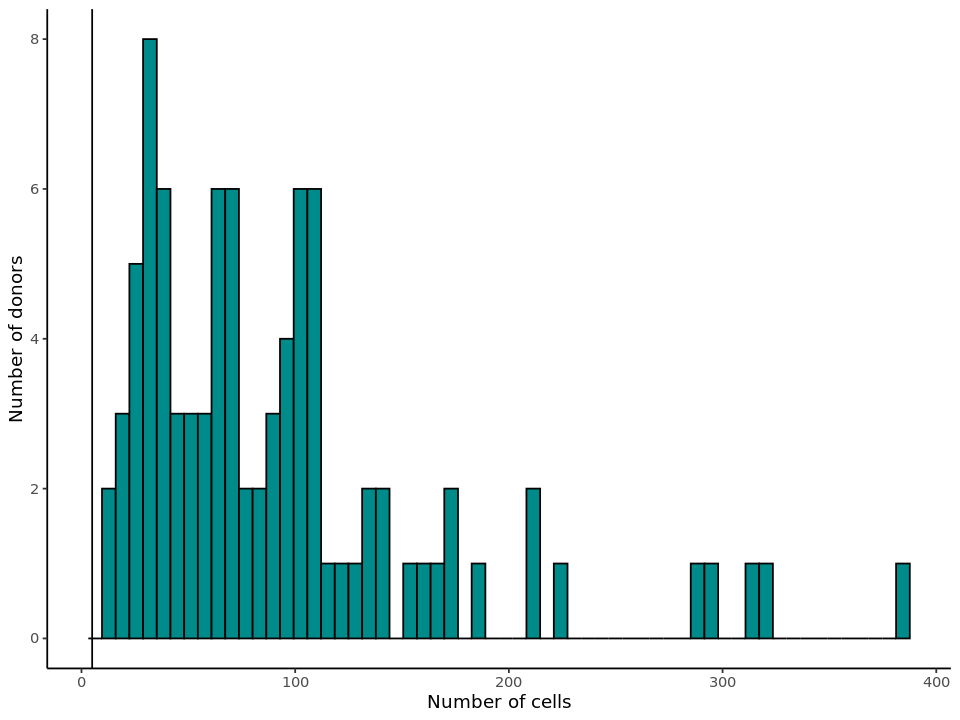

In [19]:
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df4, aes(x=ncells)) + geom_histogram(alpha = 1, col = "black", fill = "darkcyan", bins = 60) + 
    xlab("Number of cells") + ylab("Number of donors") +
#     coord_cartesian(xlim = c(14, 20), ylim = c(0,16)) + 
    theme_classic() + geom_vline(xintercept = 5)
p

In [9]:
df2 = df1[df1$day == 'day0' & df1$donor_long_id %in% unique(df$Genotype),]
nrow(df2)

[1] 8386

In [10]:
head(df2,2)

,cell,day,donor_long_id
787,21672_1#101,day0,HPSI0114i-zapk_3
788,21672_1#102,day0,HPSI0214i-wibj_2


In [14]:
df3 = df2 %>% group_by(donor_long_id) %>% summarise(ncells=n())
head(df3)

donor_long_id,ncells
HPSI0114i-bezi_1,13
HPSI0114i-eipl_1,99
HPSI0114i-iisa_3,38
HPSI0114i-joxm_1,383
HPSI0114i-kolf_2,73
HPSI0114i-vass_1,106


In [24]:
nrow(df3)
nrow(df3[df3$ncells>5,])

[1] 89

[1] 89

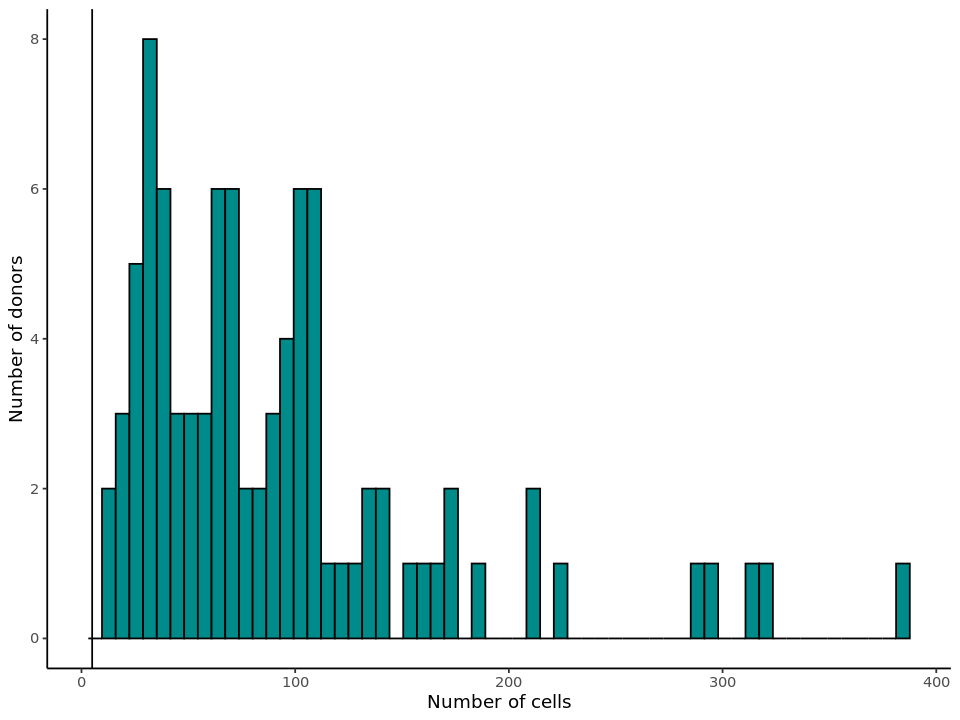

In [18]:
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df3, aes(x=ncells)) + geom_histogram(alpha = 1, col = "black", fill = "darkcyan", bins = 60) + 
    xlab("Number of cells") + ylab("Number of donors") +
#     coord_cartesian(xlim = c(14, 20), ylim = c(0,16)) + 
    theme_classic() + geom_vline(xintercept = 5)
p

In [20]:
pdf(paste0(fig_dir,"Fig_S1c.pdf"), width=8, height=6)
p
dev.off()

png 
  2

In [ ]:
# 10X (FPP)

In [3]:
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/scanpy/neuroseq_metadata_D11.txt",sep="\t")
head(df)

index,batch,donor_id,sample_id,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype,cluster_id_new
CTCGTACCACAGACAG-1-4,4,HPSI0414i-sebn_3,5245STDY7386987,1,D11,pool3,NONE,15316,P_FPP,1
CTGTGCTGTTCGCGAC-1-23,23,HPSI1013i-hiaf_1,5245STDY7632694,2,D11,pool6,NONE,20732,P_FPP,2
AACGTTGCACGAAAGC-1-31,31,HPSI0214i-datg_2,5245STDY7697816,2,D11,pool9,NONE,14291,P_FPP,2
GATCAGTGTGATGTCT-1-7,7,HPSI0514i-fiaj_1,5245STDY7487302,2,D11,pool4,NONE,11162,P_FPP,2
AGATTGCCATGGATGG-1-33,33,HPSI0513i-veve_2,5245STDY7878553,4,D11,pool11,NONE,1392,P_FPP,4
TCAACGAAGGTAGCTG-1-31,31,HPSI0214i-datg_2,5245STDY7697816,0,D11,pool9,NONE,21629,FPP,0


In [4]:
### only select QC-passing cells
qc_cell_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/neuroseq_cell_passing_filter.txt"
qc_df = as.data.frame(read.table(qc_cell_filename))
colnames(qc_df) = 'index'
nrow(qc_df)
head(qc_df,2)

[1] 132983

index
AAACCTGAGGAATGGA-1-0
AAACCTGGTAGGCATG-1-0


In [5]:
nrow(df)
df_filt = df[as.character(df$index) %in% as.character(qc_df$index),]
nrow(df_filt)

[1] 253381

[1] 132983

In [6]:
df_FPP_D11 = df_filt[df_filt$celltype == 'FPP' & df_filt$time_point == 'D11',]

In [7]:
nrow(df_FPP_D11)

[1] 132983

In [8]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [9]:
df0 = df_FPP_D11 %>% group_by(donor_id) %>% summarise(ncells=n())
head(df0)

donor_id,ncells
HPSI0114i-eipl_1,1672
HPSI0114i-kolf_2,334
HPSI0114i-wegi_1,2629
HPSI0115i-aion_2,406
HPSI0115i-aoxv_1,1851
HPSI0115i-bimq_4,338


In [10]:
nrow(df0)
nrow(df0[df0$ncells>5,])

[1] 160

[1] 157

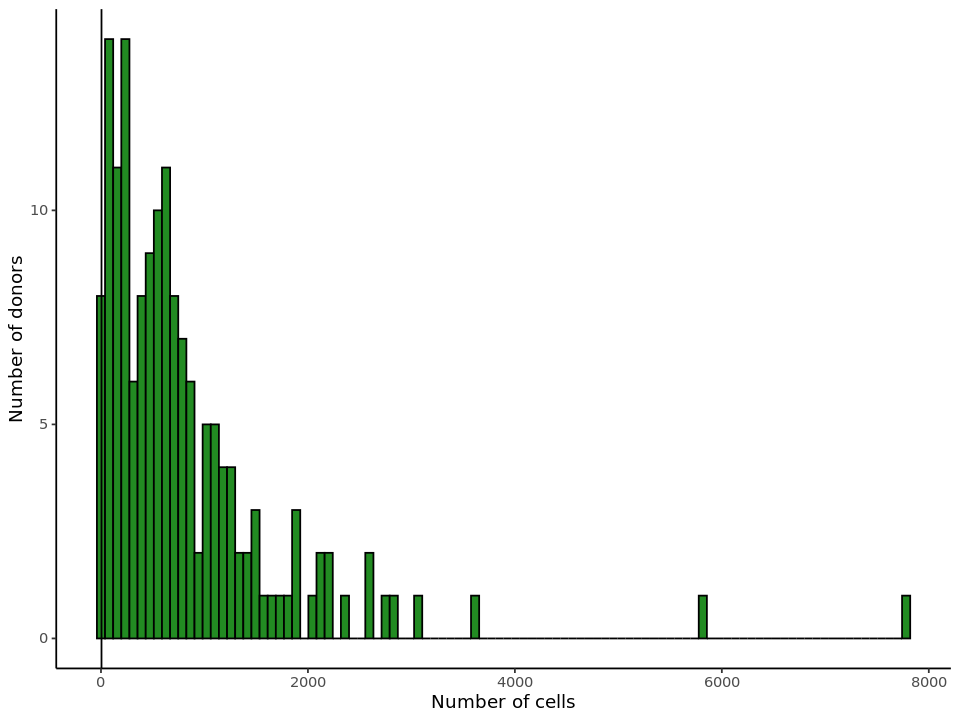

In [11]:
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df0, aes(x=ncells)) + geom_histogram(alpha = 1, col = "black", fill = "forestgreen", bins = 100) + 
    xlab("Number of cells") + ylab("Number of donors") +
#     coord_cartesian(xlim = c(14, 20), ylim = c(0,16)) + 
    theme_classic() + geom_vline(xintercept = 5)
p

In [14]:
pdf(paste0(fig_dir,"Fig_S1d.pdf"), width=8, height=6)
p
dev.off()

png 
  2